In [7]:
import scipy as scipy
import sacpy as scp
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
os.getcwd()

%cd /g/data/p66/ars599/work_bj_index/plot_bj

/g/data/p66/ars599/work_bj_index/plot_bj


In [139]:
'''
dealing with cq880 3 jobs ts data

'''

idir = './'
filenames = ['../../obs/month/HadISST_sst.1870-2020.new.nc',
             'ts_Amon_ACCESS-CM2_piControl_r1i2p1f1_gn_030101-040012.nc',
             'ts_Amon_ACCESS-CM2_piControl_r1i2p1f2_gn_030001-039912.nc',
             'ts_Amon_ACCESS-CM2_piControl_r1i2p1f3_gn_030001-039912.nc']
varnames = ['sst', 'ts', 'ts', 'ts']

def calculate_skewness(idir, filename, varname, lon_slice, lat_slice):
    filepath = os.path.join(idir, filename)
    ds = xr.open_dataset(filepath)
    # Determine the label for latitude and longitude
    if 'lat' in ds:
        lat_label = 'lat'
    elif 'latitude' in ds:
        lat_label = 'latitude'
    else:
        lat_label = 'lat'  # Set a default value

    if 'lon' in ds:
        lon_label = 'lon'
    elif 'longitude' in ds:
        lon_label = 'longitude'
    else:
        lon_label = 'lon'  # Set a default value

    df = ds.sel(**{lon_label: lon_slice, lat_label: lat_slice})
    # df = ds.sel([lon_label]=lon_slice, [lat_label]=lat_slice)
    longitude, latitude = df[varname][lon_label].values, df[varname][lat_label].values
    df_skew = scipy.stats.skew(df[varname], axis=0, bias=True)
    return df_skew, longitude, latitude

lon_slice = slice(140, 280)

lat_slice = slice(10, -10)
df1_skew, lon1, lat1 = calculate_skewness(idir, filenames[0], varnames[0], lon_slice, lat_slice)

lat_slice = slice(-10, 10)
df2_skew, lon2, lat2 = calculate_skewness(idir, filenames[1], varnames[1], lon_slice, lat_slice)
df3_skew, lon3, lat3 = calculate_skewness(idir, filenames[2], varnames[2], lon_slice, lat_slice)
df4_skew, lon4, lat4 = calculate_skewness(idir, filenames[2], varnames[3], lon_slice, lat_slice)



/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


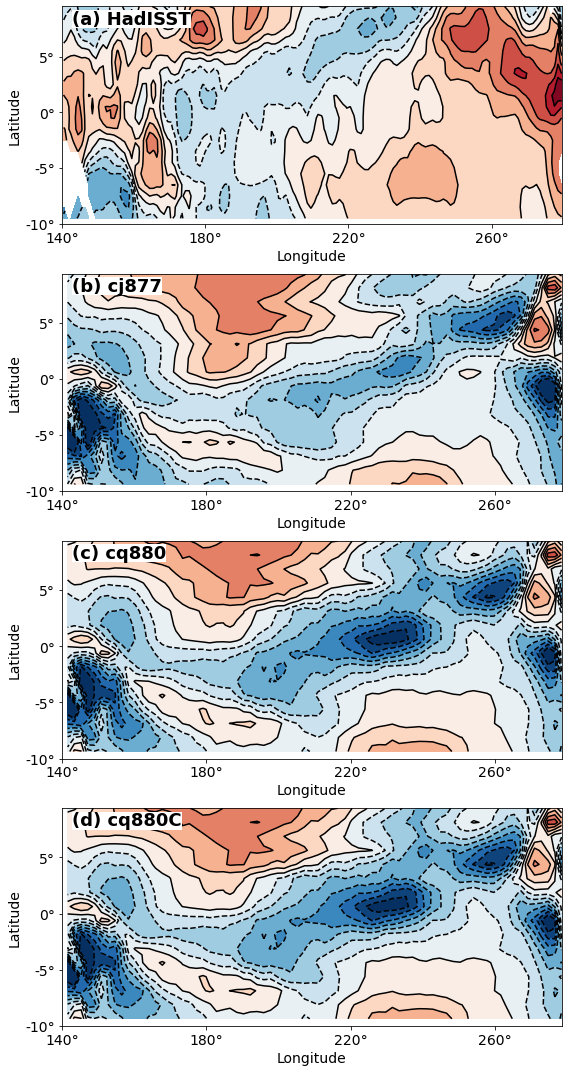

In [140]:
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

fig = plt.figure(figsize=[8, 15])
levels = np.linspace(-0.75, 0.75, 15)

# Define the data and axes
data = [(lon1, lat1, df1_skew, 'HadISST'), (lon2, lat2, df2_skew, 'cj877'), 
        (lon3, lat3, df3_skew, 'cq880'), (lon4, lat4, df4_skew, 'cq880C')]

# Loop through the data and create subplots
for i, (lon, lat, skew, text_suffix) in enumerate(data):
    ax = fig.add_subplot(4, 1, i+1)
    m = ax.contourf(lon, lat, skew, cmap='RdBu_r', levels=levels, extend="both")
    ax.contour(m, colors="black")

    # Set latitude and longitude ticks
    ax.set_xticks(np.arange(140, 280, 40), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-10, 10, 5), crs=ccrs.PlateCarree())

    # Add degree symbol to tick labels and increase font size
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x:.0f}°'))
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: f'{y:.0f}°'))
    ax.tick_params(axis='both', labelsize=14)  # Adjust the label size here

    # Add latitude and longitude labels with larger font size
    ax.set_xlabel('Longitude', fontsize=14)  # Adjust the font size here
    ax.set_ylabel('Latitude', fontsize=14)  # Adjust the font size here

    # Add panel labels with white background
    label = chr(ord('a') + i)
    text = f'({label}) {text_suffix}'
    text_obj = ax.text(0.02, 0.92, text, transform=ax.transAxes, fontsize=18, fontweight='bold',
                       bbox=dict(facecolor='white', edgecolor='none', pad=3))

    # Add white background patch behind the text
    bbox = text_obj.get_bbox_patch()
    bbox.set_boxstyle("square,pad=0", pad=0)

plt.tight_layout()

plt.savefig('cq880_skewness.png')
plt.show()
